In [17]:
#!pip install pysrt

In [17]:
!pip install spacy
!pip install nltk


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
selenium 4.20.0 requires urllib3[socks]<3,>=1.26, but you have urllib3 1.25.11 which is incompatible.



     -------------------------------------- 107.3/107.3 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 41.1/41.1 kB 1.9 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
   ---------------------------------------- 12.5/12.5 MB 11.9 MB/s eta 0:00:00
   --------------------------------------- 182.0/182.0 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 123.0/123.0 kB 7.0 MB/s eta 0:00:00
   --------------------------------------- 409.3/409.3 kB 12.9 MB/s eta 0:00:00
   ---------------------------------------- 1.9/1.9 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 57.0/57.0 kB 2.9 MB/s eta 0:00:00
   --------------------------------------- 483.7/483.7 kB 29.6 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
   ---------------------------------------- 50.1/50.1 kB 2.7 MB/s eta

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [18]:
#!pip install pysubs2


In [2]:
import pysrt
from glob import glob
path_sub = sorted(glob(r"C:\Users\91971\Downloads\demon_sub\*.ass"))

In [3]:
path_sub[:100]

['C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer - S04E01.eng.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 01.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 02.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 03.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 04.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 05.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 06.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 07.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 08.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 09.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon_sub\\Demon Slayer_ Kimetsu no Yaiba - 10.enUS.ass',
 'C:\\Users\\91971\\Downloads\\demon

In [4]:
import pysubs2

In [5]:

def extract_text_from_ass(ass_path):
    try:
        subs = pysubs2.load(ass_path)
        dialogues = [event.text for event in subs.events if event.is_comment is False]
        return "\n".join(dialogues)
    except Exception as e:
        return f"An error occurred while processing {ass_path}: {e}"

def extract_texts_from_multiple_files(path_sub):
    all_texts = []
    for path in path_sub:
        all_texts.append(extract_text_from_ass(path))
    return all_texts



extracted_texts = extract_texts_from_multiple_files(path_sub)

for text in extracted_texts:
    print(text)


{\an7}KILL
What the hell is this?
After the castles got worn down\Nfrom the Restoration,
this one, being in such a remote area,\Nmust've been abandoned and forgotten.
That's my guess.
This pisses me off.
Knowing that those demon bastards\Nare living it up like lords.
Are you sure that someone\Nfrom the village was taken here?
Yes!
Last night, we tracked her to the inside\Nof the castle tower but found nothing.
She wouldn't vanish\Ninto thin air, you moron!
How could you let them\Nditch you so fast?
I'm truly sorry!
So, another woman disappeared today.
Despite the Demon Slayer Corps\Nbeing on the alert... right under our noses...
No one's expecting anything\Nfrom you scrubs.
As it turns out...
we may not have gotten here\Ntoo late after all.
Bastard!
It looks like I should've disposed\Nof them last night!
{\an6}DESTROY
Take this!
You two, head back.
I'll be going on ahead\Nwith the Wind Hashira.
But...
You're a hindrance, all right?\NNow get out of here!
Shinazugawa...
Something's not r

In [6]:
import pandas as pd
df = pd.DataFrame(extracted_texts)

In [7]:
df = df.rename(columns={0: 'Dialogues'})

In [8]:
df.head(20)

,Dialogues
0,{\an7}KILL\nWhat the hell is this?\nAfter the ...
1,{\i1}How?{\i0}\n{\an8}{\i1}How did this happen...
2,Excuse me.\nWould it be okay if I took\Nthat b...
3,JOURNAL\NTanjiro Kamado\nLet's go.\n{\an4}DEST...
4,EPISODE 4:\NFINAL SELECTION\n{\i1}The reason I...
5,That mask.\nI can tell by the fox masks.\n{\an...
6,{\an8}DESTROY\nHave you gotten changed?\nYes.\...
7,EPISODE 7:\NMUZAN KIBUTSUJI\nNezuko!\nDon't ch...
8,"{\an8}Dear, what's the matter?\nDear?\nStop!\n..."
9,"How should we kill them, I wonder.\nI can feel..."


In [14]:
import re

# Define a function to clean the text
def clean_text(text):
    # Remove {\i0}, {\i1}, \n, and \N
    cleaned_text = re.sub(r'{\\i[01]}|\\n|\\N', '', text)
    # Remove {\anX} and \n
    cleaned_text = re.sub(r'{\\an\d}', '', cleaned_text)
    cleaned_text = re.sub(r'\\n', ' ', cleaned_text)
    
    return cleaned_text

# Apply the function to the 'text' column
df['Dialogues'] = df['Dialogues'].apply(clean_text)

print(df)


                                            Dialogues
0   KILL\nWhat the hell is this?\nAfter the castle...
1   How?\nHow did this happen?\nNezuko, don't die!...
2   Excuse me.\nWould it be okay if I tookthat bas...
3   JOURNALTanjiro Kamado\nLet's go.\nDESTROY\nThe...
4   EPISODE 4:FINAL SELECTION\nThe reason I won......
5   That mask.\nI can tell by the fox masks.\nEver...
6   DESTROY\nHave you gotten changed?\nYes.\nEPISO...
7   EPISODE 7:MUZAN KIBUTSUJI\nNezuko!\nDon't chas...
8   Dear, what's the matter?\nDear?\nStop!\nEPISOD...
9   How should we kill them, I wonder.\nI can feel...
10  It's about time for you to die!\nTwist!\nEnvel...
11  South-southeast!\nYour next location is south-...
12  Here goes...\nComin'...\nthrough!\nInfuriating...
13  I've done a good job until now!\nI have what i...
14  Take this!\nMove it!\nTake this!\nDraw your sw...
15  Tanjiro...\nListen to me...\nDemon Slayer Corp...
16  Beast Breathing Seventh Form,\nSpatial Awarene...
17  The blood of the Twelve 

In [16]:
df['Dialogues'] = df['Dialogues'].apply(lambda x: re.sub(r'\n', ' ', x))
df

,Dialogues
0,KILL What the hell is this? After the castles ...
1,"How? How did this happen? Nezuko, don't die! D..."
2,Excuse me. Would it be okay if I tookthat bask...
3,JOURNALTanjiro Kamado Let's go. DESTROY The De...
4,EPISODE 4:FINAL SELECTION The reason I won... ...
5,That mask. I can tell by the fox masks. Everyo...
6,DESTROY Have you gotten changed? Yes. EPISODE ...
7,EPISODE 7:MUZAN KIBUTSUJI Nezuko! Don't chase ...
8,"Dear, what's the matter? Dear? Stop! EPISODE 8..."
9,"How should we kill them, I wonder. I can feel ..."


In [22]:
!pip install --upgrade click typer


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.



  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 47.2/47.2 kB 786.6 kB/s eta 0:00:00
Using cached rich-13.7.1-py3-none-any.whl (240 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
   ---------------------------------------- 1.2/1.2 MB 5.9 MB/s eta 0:00:00
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.7.2
    Uninstalling Pygments-2.7.2:
      Successfully uninstalled Pygments-2.7.2
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: typer
    Found existing installation: type

In [ ]:
#!python -m spacy download en_core_web_md

In [19]:

import spacy
nlp = spacy.load("en_core_web_md")


In [20]:
doc = nlp("tanjiro is the sun breathing style master in japan")

In [21]:
doc

tanjiro is the sun breathing style master in japan

In [22]:
for ent in doc.ents: 
    print(ent.text,ent.label_)

tanjiro PERSON
japan GPE


In [23]:
from nltk import sent_tokenize

def get_ners(script):
    script_sentences = sent_tokenize(script)

    ner_output = []
    
    for sentence in script_sentences:
        doc = nlp(sentence)
        ners = set()
        for ent in doc.ents: 
            if ent.label_=='PERSON':
                full_name = ent.text
                first_name=full_name.split(' ')[0]
                ners.add(first_name)
        ner_output.append(list(ners))
    return ner_output

In [24]:
df['ners'] = df['Dialogues'].apply(get_ners)

In [25]:
window=10
entity_relationship = []

for row in df['ners']:
    previous_entities_in_window = []
    
    for sentence in row:
        previous_entities_in_window.append(sentence)
        previous_entities_in_window = previous_entities_in_window[-10:]
        
        previous_entities_flattened= sum(previous_entities_in_window, [])
        
        for entity in sentence:            
            for entity_in_window in previous_entities_flattened:
                if entity!=entity_in_window:
                    entity_rel = sorted([entity,entity_in_window])
                    entity_relationship.append(entity_rel)

In [26]:
relationship_df = pd.DataFrame({'value':entity_relationship})

In [27]:

relationship_df['source'] = relationship_df['value'].apply(lambda x: x[0])
relationship_df['target'] = relationship_df['value'].apply(lambda x: x[1])

In [28]:
relationship_df = relationship_df.groupby(['source','target']).count().reset_index()

In [29]:
relationship_df = relationship_df.sort_values('value',ascending=False)
relationship_df.head()

,source,target,value
403,Nezuko,Tanjiro,27
27,Ashinuke,Suma,19
136,Hashira,Muzan,12
458,Sabito,Tanjiro,11
494,Tamayo,Tanjiro,11


In [30]:
relationship_df = relationship_df.head(200)

In [31]:
import networkx as nx
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

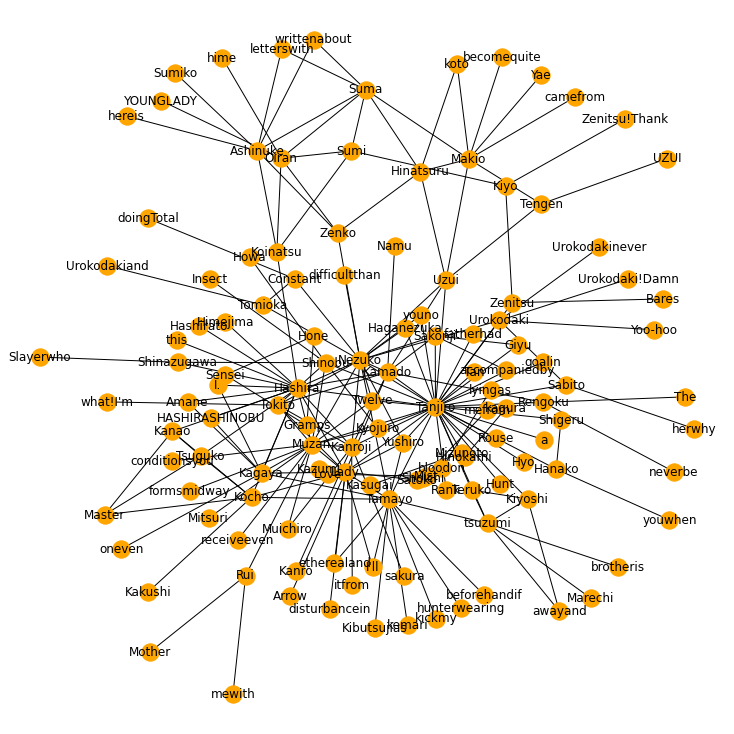

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='orange', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [38]:
#!pip install pyvis

In [39]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("naruto.html")

naruto.html
